In [31]:
import pandas as pd
import numpy as np

%matplotlib inline



In [4]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Train data is a list of words in a review.

It's not the actual words, but rather integers representing word ids

```
[1,
 14,
 22,
 16,
 43,
 ...
 ]

```


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

`get_word_index()` is a mapping from text --> id (int)

```
{
    "harpo's": 40831,
    'canet': 52011,
    'aileen': 19313,
    'acurately': 52012,
    "diplomat's": 52013,
    'rickman': 25242,
    'arranged': 6746,
    'rumbustious': 52014,
    'familiarness': 52015,
    "spider'": 52016,
    ...
}
```

The mapping can then be turned back into words:


```
['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 ...
 ]

```

Strangely we have to offset by 3. Perhaps it's explained in the dataset but 0,1,2 are reserved words for start, end, etc. 

Note that this actually reads like a sentence.

In [14]:
idx_to_word = {idx: word for word, idx in imdb.get_word_index().items()}

In [21]:
[idx_to_word.get(idx-3, '?') for idx in train_data[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

The sentences have different lengths, as we might expect.

In [ ]:
sent_lengths = [len(sent) for sent in train_data]
sent_lengths = pd.Series(sent_lengths)

In [28]:
sent_lengths.head()

0    218
1    189
2    141
3    550
4    147
dtype: int64

Someone went through and marked all the labels, positive or negative

This is much simpler because each review is either positive or neg, so there isn't much procssing to be done.

In [30]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [34]:
def vectorize_sents(sequences, dimensions=10000):
    matrix = np.zeros((len(sequences), dimensions))
    for i, seq in enumerate(sequences):
        matrix[i, seq] = 1
    return matrix

In [54]:
x_train = vectorize_sents(train_data)
x_test = vectorize_sents(test_data)

In [55]:
y_train = np.asarray(train_labels, dtype=np.float32)
y_test = np.asarray(test_labels, dtype=np.float32)

In [37]:
y_train[0]

1.0

Each step is a dot product

```
    output = relu(dot(W, input) + b)
```

In [48]:
from keras import models
from keras import layers

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

How are the params calculated for each layer?

1) `10000 * 16 + 16`

10,000 is the input, 16 is the number of nodes in the hidden layer, and one bias term for each hidden layer (16)

2) `16 * 16 + 16`

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [47]:
16 * 16 + 16

272

Note: instead of using the string names for the parameters, there are configurable objects.

e.g.

** Metrics **
```
metrics.K
metrics.MAE
metrics.MAPE
metrics.MSE
metrics.absolute_import
metrics.binary_accuracy
metrics.binary_crossentropy
metrics.categorical_accuracy
metrics.categorical_crossentropy
metrics.cosine
metrics.cosine_proximity
metrics.deserialize
metrics.deserialize_keras_object
metrics.get
metrics.hinge
metrics.kullback_leibler_divergence
metrics.logcosh
metrics.mae
metrics.mape
metrics.mean_absolute_error
metrics.mean_absolute_percentage_error
metrics.mean_squared_error
metrics.mean_squared_logarithmic_error
metrics.mse
metrics.msle
metrics.poisson
metrics.serialize
metrics.six
metrics.sparse_categorical_accuracy
metrics.sparse_categorical_crossentropy
metrics.squared_hinge
metrics.top_k_categorical_accuracy

```
** Optimizers **

```
optimizers.Adadelta
optimizers.Adagrad
optimizers.Adam
optimizers.Adamax
optimizers.K
optimizers.Nadam
optimizers.Optimizer
optimizers.RMSprop
optimizers.SGD
optimizers.TFOptimizer
optimizers.absolute_import
optimizers.adadelta
optimizers.adagrad
optimizers.adam
optimizers.adamax
optimizers.clip_norm
optimizers.nadam
optimizers.rmsprop
optimizers.sgd

```

In [74]:
from keras import optimizers
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=[metrics.binary_accuracy])

In [53]:
optimizers.*?

# create a validation set


From our training data, section it off into training and validation

This doesn't just seem like a formality, it's a necessity because we need to pass validation data into our model to see how it compares against 'unknown' data.

In [57]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [75]:
partial_x_train = x_train[:10000]
partial_y_train = y_train[:10000]


x_val = x_train[10000:]
y_val = y_train[10000:]

In [59]:
history = model.fit?

In [76]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val[:1000], y_val[:1000]))

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 5s - loss: 0.5462 - binary_accuracy: 0.7398 - val_loss: 0.4111 - val_binary_accuracy: 0.8590
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3214 - binary_accuracy: 0.8967 - val_loss: 0.3380 - val_binary_accuracy: 0.8660
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.2269 - binary_accuracy: 0.9327 - val_loss: 0.2988 - val_binary_accuracy: 0.8740
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.1811 - binary_accuracy: 0.9462 - val_loss: 0.2979 - val_binary_accuracy: 0.8720
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.1380 - binary_accuracy: 0.9658 - val_loss: 0.3001 - val_binary_accuracy: 0.8740
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.1093 - binary_accuracy: 0.9732 - val_loss: 0.3090 - val_binary_accuracy: 0.8760
Epoch 7/10
10000/10000 [=====================

In [77]:
history.history

{'binary_accuracy': [0.73980000019073489,
  0.89670000047683718,
  0.93270000019073485,
  0.94620000076293942,
  0.96580000076293948,
  0.97319999942779545,
  0.98119999942779546,
  0.98589999952316287,
  0.98939999961853031,
  0.9929999992370605],
 'loss': [0.54621490845680232,
  0.32143812708854674,
  0.22687705881595613,
  0.18108822700977326,
  0.13799262790679931,
  0.1093250901222229,
  0.085483987557888025,
  0.070435939276218412,
  0.057200011432170871,
  0.043082882022857663],
 'val_binary_accuracy': [0.85900001192092901,
  0.86600000095367435,
  0.87400000476837159,
  0.87200000476837158,
  0.8739999866485596,
  0.8759999866485596,
  0.87300000476837158,
  0.87199999141693119,
  0.86800000476837158,
  0.841999997138977],
 'val_loss': [0.41105259776115416,
  0.33799002242088316,
  0.29882962083816528,
  0.29787120556831359,
  0.30014487886428831,
  0.30904895973205565,
  0.32446207571029662,
  0.34850335907936097,
  0.37209893274307249,
  0.50833274221420288]}

In [80]:
print(history.history.keys())
df = pd.DataFrame(history.history)

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


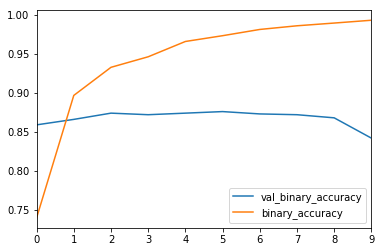

In [81]:
df[['val_binary_accuracy','binary_accuracy']].plot()

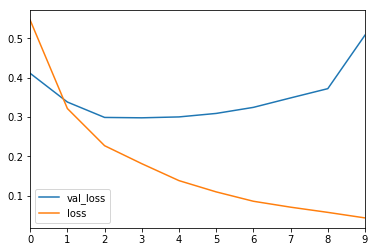

In [83]:
df[['val_loss','loss']].plot()